In [1]:
import torch
from torchvision import datasets, transforms

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
import matplotlib.pyplot as plt

from tqdm import tqdm

if torch.cuda.is_available():
  device = torch.device("cuda:0")
  print("GPU")
else:
  device = torch.device("cpu")
  print("CPU")

GPU


In [2]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # image 28 X 28 = 784
        self.input_layer = nn.Linear(784, 64)
        self.hidden1 = nn.Linear(64, 64)
        self.hidden2 = nn.Linear(64, 64)
        self.output = nn.Linear(64, 10)
    def forward(self, data):
        data = F.relu(self.input_layer(data))
        data = F.relu(self.hidden1(data))
        data = F.relu(self.hidden2(data))
        data = self.output(data)
        
        return F.log_softmax(data, dim=1)

In [3]:
training = datasets.MNIST("", train=True, download=True, 
                          transform = transforms.Compose([transforms.ToTensor()]))

testing = datasets.MNIST("", train=False, download=True, 
                          transform = transforms.Compose([transforms.ToTensor()]))


train_set = torch.utils.data.DataLoader(training, batch_size=10, shuffle=True)
test_set = torch.utils.data.DataLoader(testing, batch_size=10, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



Training the model

In [4]:
network = Network().to(device)

learn_rate = optim.Adam(network.parameters(), lr=0.001)
epochs = 5

for i in tqdm(range(epochs)):
    for data in train_set:
        image, output = data
        image = image.to(device)
        output = output.to(device)
        network.zero_grad()
        result = network(image.view(-1,784))
        loss = F.nll_loss(result,output)
        loss.backward()
        learn_rate.step()
    print(loss)

 20%|██        | 1/5 [00:20<01:23, 20.75s/it]

tensor(0.0481, device='cuda:0', grad_fn=<NllLossBackward0>)


 40%|████      | 2/5 [00:38<00:56, 18.93s/it]

tensor(0.0072, device='cuda:0', grad_fn=<NllLossBackward0>)


 60%|██████    | 3/5 [00:57<00:38, 19.22s/it]

tensor(0.0976, device='cuda:0', grad_fn=<NllLossBackward0>)


 80%|████████  | 4/5 [01:15<00:18, 18.59s/it]

tensor(0.1442, device='cuda:0', grad_fn=<NllLossBackward0>)


100%|██████████| 5/5 [01:33<00:00, 18.80s/it]

tensor(0.0182, device='cuda:0', grad_fn=<NllLossBackward0>)


Testing the model

In [5]:
network.eval()

correct = 0
total = 0

with torch.no_grad():
    for data in test_set:
        image, output = data
        image = image.to(device)
        output = output.to(device)
        result = network(image.view(-1,784))
        for index, tensor_value in enumerate(result):
            total += 1
            if torch.argmax(tensor_value) == output[index]:
                correct += 1
                
accuracy = correct / total
print(f"Accuracy: {accuracy}")

Accuracy: 0.9735


Look at the image processing

In [6]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [7]:
!ls '/content/gdrive/MyDrive/Colab Notebooks'

'Copy of Autodiff Cookbook.ipynb'
'Copy of CS330_Homework1_Stencil.ipynb'
'Copy of CS330_Homework2_Stencil_TF2.0.ipynb'
'Copy of CS330_Homework4_Stencil'
'Copy of CS330 Homework Stencil.ipynb'
'Copy of CS330.ipynb'
'Copy of KivyMD_to_APK.ipynb'
'DS504-CS586-Project2-Pytorch_tutorial (1).ipynb'
 DS504-CS586-Project2-Pytorch_tutorial.ipynb
 DS504-Project1-2023Spring.ipynb
 Example_PyTorch_on_Colab_GPU.ipynb
 firstTest.png
 KivyMD_to_APK.ipynb
 Untitled0.ipynb


tensor(5, device='cuda:0')


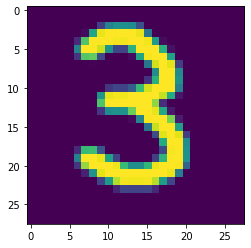

In [8]:
from PIL import Image
import numpy as np
import PIL.ImageOps   

img = Image.open("gdrive/MyDrive/Colab Notebooks/firstTest.png")
img = img.resize((28,28))
img = img.convert("L")
img = PIL.ImageOps.invert(img)

plt.imshow(img)

img = np.array(img)
img = img / 255
image = torch.from_numpy(img)
image = image.float().to(device)

result = network.forward(image.view(-1,28*28))
print(torch.argmax(output))